# Алгоритмы анализа данных

__function_name?__ нажать __Ctrl+Enter__.<br>
Чтобы посмотреть исходный код - __function_name??__ нажать __Ctrl+Enter__.<br>
Как вызвать справку jupyter notebook?
https://ru.stackoverflow.com/questions/629610/Как-вызвать-справку-jupyter-notebook

In [1]:
# Compute the arithmetic mean (среднее арифметическое) along the specified axis.
np.mean?

Object `np.mean` not found.


In [2]:
# Compute the standard deviation (стандартное отклонение) along the specified axis.
np.std??

Object `np.std` not found.


### Урок 3. Логистическая регрессия. Log Loss

## <center> Практическое задание </center>

__1*.__ Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log. 

__2.__ Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

__3.__ Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

__4.__ Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

__5.__ Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

__6.__ Могла ли модель переобучиться? Почему?

__7*.__ Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Матрица признаков
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]], dtype = np.float64)

# Вектор истинных значений
y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [5]:
def sigmoid(z):
    '''
    Сигмоида 𝜎(<w,x>):ℝ→[0,1]

    Функция 𝜎(<w,x>) переводит полученное в скалярном произведении значение ( z = W * X ) 
    в вероятность, пределы которой будут лежать в промежутке от 0 до 1.
    
    '''

    res = 1 / (1 + np.exp(-z))
    return res

In [6]:
def calc_std_feat(x):
    '''
    Масштабирование признаков методом стандартизации
    
    '''
    
    res = (x - x.mean()) / x.std()
    return res

In [7]:
# Масштабируем матрицу признаков
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])

In [8]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  3.        ,
         0.        ,  5.        , 10.        ,  1.        ,  2.        ],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  2.        ,
         1.        ,  3.        ,  3.        ,  1.        ,  2.        ]])

### 1*. Задача:
Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [9]:
# Не изменённый вариант функции
def calc_logloss(y, y_pred):
    '''
    Логарифмическая функция потерь
    
    y - вектор истинных значений
    y_pred = P+ вероятность отнесения объекта к классу +1: P(y=1|x)
    
    '''

    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

Изменяем функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [10]:
# Изменённый вариант функции
def calc_logloss(y, y_pred):
    '''
    Логарифмическая функция потерь  (нули не попадают в np.log.)
    
    y - вектор истинных значений
    y_pred = P+ вероятность отнесения объекта к классу +1: P(y=1|x)
    
    '''
    
    # Обрабатываем 0 и 1 из вектора вероятностей (0+0.01, 1-0.01).
    # Можно проварьировать параметр изменения вероятности.
    for i in range(len(y_pred)):
        if (y_pred[i] == 0):
            y_pred[i] = 1e-2
        if (y_pred[i] == 1):
            y_pred[i] -= 1e-2

    # print(len(y_pred), len(z_y_pred), z_y_pred, z_y)
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

In [11]:
# Проверка
y_1 = np.array([0, 1], dtype = np.float64)
y_pred_1 = np.array([0, 0.1], dtype = np.float64)
y_1, y_pred_1

(array([0., 1.]), array([0. , 0.1]))

In [12]:
calc_logloss(y_1, y_pred_1)

1.1563177144237735

### 2. Задача:
Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

$\alpha\cdot$
$\nabla_wQ(w,X)$

In [13]:
### Logistic Regression

In [14]:
def eval_model(X, y, iterations, alpha=1e-4):
    ''' 
    Обучаем модель методом градиентного спуска
    
    iterations - количество итераций (условие прерывания алгоритма)
    alpha - скорость обучения
    
    '''
    
    # задаем начальные условия для генератора случайных чисел (повторяемость результата).
    np.random.seed(42)
    
    # сгенерируем вектор истинных весов
    # возвращаем несколько значений выборки из стандартного нормального распределения (X.shape[0]=4).
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    
    # ход градиентного спуска
    for i in range(1, iterations+1):
        
        # делаем предсказание z=W*X (умножаем вектор W на матрицу признаков X
        z = np.dot(W, X)
        
        # переводим значения z в вероятности (от 0 до 1)
        y_pred = sigmoid(z)
        
        # Вычисляем ошибку на i шаге 𝑄(𝑤,𝑋)
        err = calc_logloss(y, y_pred)
        
        # Вычисляем новое значение вектора весов  W_new = W - 𝛼·∇𝑤(𝑄(𝑤,𝑋))
        W -= alpha * (1/n * np.dot((y_pred - y), X.T)) 
        
    if i % (iterations / 10) == 0:
        print(f'i={i}, W={W}, err={err:.6f}')

    return W

In [15]:
# Неизменённая функция calc_logloss(y, y_pred):
# W - истинный вектор весов
W = eval_model(X_st, y, iterations=1000, alpha=1e-5)
W = eval_model(X_st, y, iterations=10000, alpha=1e-5)
W = eval_model(X_st, y, iterations=100000, alpha=1e-5)

i=1000, W=[ 0.49282757 -0.15007512  0.64748969  1.51727928], err=1.201313
i=10000, W=[ 0.45886981 -0.25439705  0.6453131   1.46695998], err=1.039365
i=100000, W=[ 0.25809285 -0.68188567  0.6883469   1.2412009 ], err=0.590673


In [16]:
W = eval_model(X_st, y, iterations=1000, alpha=1e-1)
W = eval_model(X_st, y, iterations=10000, alpha=1e-1)
W = eval_model(X_st, y, iterations=100000, alpha=1e-1)

i=1000, W=[-2.77136565 -0.99588853  0.56641089  3.26813012], err=0.405878
i=10000, W=[-11.27241705  -1.45342424  -2.38315559   9.49424167], err=0.252383
i=100000, W=[-35.8933164   -3.59426199  -9.64639296  29.4060647 ], err=0.116671


In [17]:
W = eval_model(X_st, y, iterations=1000, alpha=1)
W = eval_model(X_st, y, iterations=10000, alpha=1)
W = eval_model(X_st, y, iterations=100000, alpha=1)

i=1000, W=[-11.32397854  -1.45756231  -2.39926134   9.53555126], err=0.251910
i=10000, W=[-35.907977    -3.59554341  -9.65060282  29.4178451 ], err=0.116635
i=100000, W=[-143.31661218  -17.65497665  -32.28077915  127.74350957], err=0.040484


In [53]:
W = eval_model(X_st, y, iterations=1000, alpha=10)
W = eval_model(X_st, y, iterations=10000, alpha=10)
W = eval_model(X_st, y, iterations=100000, alpha=10)

i=1000, W=[-67.20839203  -6.37997719 -18.2521044   54.83753943], err=0.070169
i=10000, W=[-181.33758972  -23.14529545  -39.39598481  163.87960615], err=0.033711
i=100000, W=[-1311.91153553  -179.12343794  -259.00442698  1215.43684289], err=0.010984


In [52]:
W = eval_model(X_st, y, iterations=1000, alpha=20)
W = eval_model(X_st, y, iterations=10000, alpha=20)
W = eval_model(X_st, y, iterations=100000, alpha=20)

i=1000, W=[-155.6157941   -16.9005628   -39.74544129  134.7052772 ], err=0.118530
i=10000, W=[-388.9057345   -51.72962728  -81.01044166  356.53899761], err=0.015253
i=100000, W=[-2633.23525331  -362.18637934  -512.8012476   2445.20864538], err=0.009982


__Вывод__:

___log loss минимальный при___:<br>
Скорость обучения $\alpha$=20,<br>
Количество итераций __i__=100000,<br>
Вектор весов __W__=[-2633.23525331  -362.18637934  -512.8012476   2445.20864538],<br>
Ошибка __err__=0.009982


### 3. Задача:
Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).


In [20]:
 def calc_pred_proba(W, X):
    ''' Возвращающую предсказанную вероятность класса 1 '''
    
    z = np.dot(W, X)
    y_pred_proba = sigmoid(z)
        
    return y_pred_proba

In [21]:
calc_pred_proba(W, X_st)

<ipython-input-5-d60a7b44af67>:10: RuntimeWarning: overflow encountered in exp
  res = 1 / (1 + np.exp(-z))


array([2.32546235e-117, 0.00000000e+000, 1.00000000e+000, 0.00000000e+000,
       1.00000000e+000, 3.75344497e-002, 1.00000000e+000, 7.88496116e-283,
       9.99882708e-001, 1.00000000e+000])

### 4. Задача:
Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [22]:
 def calc_pred(W, X, porog):
    ''' Возвращающую предсказанную вероятность класса 1 '''
    
    y_pred = np.array([])
    z = np.dot(W, X)
    y_pred_proba = sigmoid(z)
    
    for i in range(len(y_pred_proba)):
        if (y_pred_proba[i] > porog):
            y_pred = np.append(y_pred, 1)
        else:
            y_pred = np.append(y_pred, 0)    
        
    return y_pred

In [23]:
calc_pred(W, X_st, 0.5), y


<ipython-input-5-d60a7b44af67>:10: RuntimeWarning: overflow encountered in exp
  res = 1 / (1 + np.exp(-z))


(array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.]),
 array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.]))

### 5. Задача:
Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

In [24]:
# Ради интиреса за основу примем не оптимальную модель
W = eval_model(X_st, y, iterations=1000, alpha=1e-1)

i=1000, W=[-2.77136565 -0.99588853  0.56641089  3.26813012], err=0.405878


In [25]:
y_pred = calc_pred(W, X_st, 0.5)
y_pred, y

(array([0., 0., 1., 0., 1., 1., 1., 0., 0., 1.]),
 array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.]))

__Доля правильных ответов (Accuracy)__:

$$accuracy(a,x) = \frac{1}{l} \sum^{l}_{i=1}[a(x_{i})=y_{i}].$$


In [26]:
def calc_accuracy(y, w, x, porog):
    ''' 
    Расчёт доли правильных ответов (accuracy)
    
    porog - порог отнесения к классу 1
    
    '''

    y_pred = calc_pred(W, X_st, porog)
    
    k = 0
    for i in range(len(y_pred)):
        if (y_pred[i] == y[i]):
            k += 1
            
    return k/len(y_pred)

In [27]:
# В нашем случае у нас есть 
accuracy = calc_accuracy(y, W, X_st, 0.5)
accuracy

0.8

In [28]:
# Проверка
import  sklearn.metrics
from sklearn.metrics import accuracy_score

In [29]:
y_pred

array([0., 0., 1., 0., 1., 1., 1., 0., 0., 1.])

In [30]:
acc = accuracy_score(y, y_pred)
acc

0.8

__Матрица ошибок (Confusion matrix)__<br>

|  <empty>   | $$y = +1$$ | $$y = -1$$ |
--- | --- | ---
| __$$a(x) = +1$$__  |   TP    |   FP   |
| __$$a(x) = -1$$__ |   FN    |   TN   |

In [31]:
def calc_confusion_matrix(y_true, y_pred):
    ''' Вычисляем матрицу ошибок (confusion matrix)
    для двух np.arrays true и pred.
    Аналог:
    "from sklearn.metrics import confusion_matrix"
    '''

    K = len(np.unique(y_true)) # Number of classes 
    res = np.zeros((K, K))

    for i in range(len(y_true)):
        res[int(y_true[i])][int(y_pred[i])] += 1

    return res

In [32]:
# Вычисляем матрицу ошибок для нашего случая
conf_matrix = calc_confusion_matrix(y, y_pred)
conf_matrix

array([[4., 1.],
       [1., 4.]])

In [33]:
# Проверка
from sklearn.metrics import confusion_matrix

confusion_matrix(y, y_pred)

array([[4, 1],
       [1, 4]], dtype=int64)

Результаты совпадают<br><br><br><br>

__Точность (Precision)__ - доля истинных срабатываний от общего количества срабатываний.<br>
$$precision(a, X) = \frac{TP}{TP+FP}.$$

In [34]:
precision = conf_matrix[0][0]/(conf_matrix[0][0] + conf_matrix[0][1])
precision

0.8

In [35]:
# Проверка
from sklearn.metrics import precision_score

precision = precision_score(y, y_pred, pos_label=1)
precision

0.8

__Полнота (Recall)__ - доля объектов, истинно относящихся к классу "+1", которые алгоритм отнес к этому классу<br>
$$recall(a, X) = \frac{TP}{TP+FN},$$

In [36]:
recall = conf_matrix[0][0]/(conf_matrix[0][0] + conf_matrix[1][0])
recall

0.8

In [37]:
# Проверка
from sklearn.metrics import recall_score

recall = recall_score(y, y_pred, pos_label=1)
recall

0.8

__F-мера (F1 score)__
$$F = \frac{2 \cdot precision \cdot recall }{ presision + recall}.$$

In [38]:
F = 2*(precision*recall)/(precision + recall)
F

0.8000000000000002

In [39]:
# Проверка 
# sklearn.metrics.f1_score - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
from sklearn.metrics import f1_score

f1_score(y, y_pred, average='macro')

0.8000000000000002

### 6. Задача:
 Могла ли модель переобучиться? Почему?

Переобучение - модель настроилась на шумы, а не на общие закономерности и тренды.

### 7*. Задача:
Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.

L1-регуляризация способствует разреженности функции, когда лишь немногие факторы не равны нулю.<br>
L2-регуляризация способствует появлению малых весовых коэффициентов модели, но не способствует их точному равенству нулю.<br>
Оба метода помогают улучшить обобщение и ошибки, поскольку не допускают переобучения модели из-за шума в данных.<br>
При L2-регуляризации дополнительный член является квадратичной функцией, при L1-регуляризации – модулем.<br><br>

При квадратичном члене, чем ближе вы находитесь к нулю, тем меньшей становится ваша производная, пока также не приблизится к нулю. Поэтому при L2-регуляризации, когда ваша величина w уже мала, дальнейший градиентный спуск уже её сильно не изменит.<br>
В случае модуля производная является константой с абсолютной величиной, равной единице. Формально в нуле она не определена, но мы считаем её также равной нулю. Поэтому при L1-регуляризации градиентный спуск будет стремиться к нулю с постоянной скоростью, а достигнув его, там и останется. Вследствие этого L2-регуляризация способствует малой величине весовых коэффициентов, а L1-регуляризация способствует их равенству нулю, тем самым провоцируя разрежённость.

Можно включить в свою модель сразу и L1, и L2-регуляризации. Такая модель даже имеет специальное название – __ElasticNet__. 
Это просто добавление и штрафа L1-регуляризации, и штрафа L2-регуляризации к вашей функции затрат.

$$J_{RIDGE} = J + \lambda_2|w|^2 $$
$$J_{LASSO} = J + \lambda_1|w| $$
$$J_{ELASTICNET } = J + \lambda_1|w| + \lambda_2|w|^2 $$

In [40]:
# W - истинный вектор весов
W = eval_model(X_st, y, iterations=1000, alpha=1e-5)
W = eval_model(X_st, y, iterations=10000, alpha=1e-5)
W = eval_model(X_st, y, iterations=100000, alpha=1e-5)

i=1000, W=[ 0.49282757 -0.15007512  0.64748969  1.51727928], err=1.201313
i=10000, W=[ 0.45886981 -0.25439705  0.6453131   1.46695998], err=1.039365
i=100000, W=[ 0.25809285 -0.68188567  0.6883469   1.2412009 ], err=0.590673


In [41]:
# Returns an element-wise indication of the sign of a number.
# Функция sign(x) возвращает единицу, если x>0,  минус единицу, если x<0, и нуль, если x=0.
# np.sign?? 

In [42]:
def eval_model_l1(X, y, iterations, alpha=1e-4):
    ''' 
    Градиентный спуск
    L1-регуляризация
    
    iterations - количество итераций (условие прерывания алгоритма)
    alpha - скорость обучения
    
    '''
    
    # задаем начальные условия для генератора случайных чисел (повторяемость результата).
    np.random.seed(42)
    
    # сгенерируем вектор истинных весов
    # возвращаем несколько значений выборки из стандартного нормального распределения (X.shape[0]=4).
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    
    # ход градиентного спуска
    for i in range(1, iterations+1):
        
        # делаем предсказание z=W*X (умножаем вектор W на матрицу признаков X
        z = np.dot(W, X)
        
        # переводим значения z в вероятности (от 0 до 1)
        y_pred = sigmoid(z)
        
        # Вычисляем ошибку на i шаге 𝑄(𝑤,𝑋)
        err = calc_logloss(y, y_pred)
        
        # Вычисляем новое значение вектора весов (l2-регуляризация) W_new = W - 𝛼·∇𝑤(𝑄(𝑤,𝑋)) + lambda*|W|
        W -= alpha * (1/n * np.dot((y_pred - y), X.T) + 2*np.sign(W)) 
        
    if i % (iterations / 10) == 0:
        print(f'i={i}, W={W}, err={err:.6f}')

    return W

In [43]:
# W - истинный вектор весов
W = eval_model_l1(X_st, y, iterations=1000, alpha=1e-5)
W = eval_model_l1(X_st, y, iterations=10000, alpha=1e-5)
W = eval_model_l1(X_st, y, iterations=100000, alpha=1e-5)

i=1000, W=[ 0.4728311  -0.13007488  0.627488    1.49728315], err=1.205278
i=10000, W=[ 0.25925794 -0.05452568  0.44509247  1.26736528], err=1.080879
i=100000, W=[ 3.74206502e-06  7.41569932e-06 -1.41768584e-05 -6.88292739e-06], err=0.693145


In [44]:
def eval_model_l2(X, y, iterations, alpha=1e-4):
    ''' 
    Градиентный спуск
    L2-регуляризация
    
    iterations - количество итераций (условие прерывания алгоритма)
    alpha - скорость обучения
    
    '''
    
    # задаем начальные условия для генератора случайных чисел (повторяемость результата).
    np.random.seed(42)
    
    # сгенерируем вектор истинных весов
    # возвращаем несколько значений выборки из стандартного нормального распределения (X.shape[0]=4).
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    
    # ход градиентного спуска
    for i in range(1, iterations+1):
        
        # делаем предсказание z=W*X (умножаем вектор W на матрицу признаков X
        z = np.dot(W, X)
        
        # переводим значения z в вероятности (от 0 до 1)
        y_pred = sigmoid(z)
        
        # Вычисляем ошибку на i шаге 𝑄(𝑤,𝑋)
        err = calc_logloss(y, y_pred)
        
        # Вычисляем новое значение вектора весов (l2-регуляризация) W_new = W - 𝛼·∇𝑤(𝑄(𝑤,𝑋)) + lambda*W 
        W -= alpha * (1/n * np.dot((y_pred - y), X.T) + 0.1*W) 
        
    if i % (iterations / 10) == 0:
        print(f'i={i}, W={W}, err={err:.6f}')

    return W

In [45]:
# W - истинный вектор весов
W = eval_model_l2(X_st, y, iterations=1000, alpha=1e-5)
W = eval_model_l2(X_st, y, iterations=10000, alpha=1e-5)
W = eval_model_l2(X_st, y, iterations=100000, alpha=1e-5)

i=1000, W=[ 0.4923338  -0.14992995  0.64684208  1.51576088], err=1.200410
i=10000, W=[ 0.45419937 -0.25229978  0.63885105  1.45220195], err=1.031865
i=100000, W=[ 0.23185286 -0.61912998  0.62525208  1.12672326], err=0.590607


L1 и L2-регуляризация для логистической регрессии - https://craftappmobile.com/l1-и-l2-регуляризация-для-логистической-регрессии<br>
Обучение логистической регрессии - https://vc.ru/dev/72964-obuchenie-logisticheskoy-regressii

Как написать матрицу путаницы в Python? - https://coderoad.ru/2148543/Как-написать-матрицу-путаницы-в-Python<br>
Оценка моделей ML/DL: матрица ошибок, Accuracy, Precision и Recall - https://pythonru.com/baza-znanij/metriki-accuracy-precision-i-recall

In [46]:
import pandas as pd
y_actu = pd.Series([2, 0, 2, 2, 0, 1, 1, 2, 2, 0, 1, 2], name='Actual')
y_pred = pd.Series([0, 0, 2, 1, 0, 2, 1, 0, 2, 0, 2, 2], name='Predicted')
df_confusion_1 = pd.crosstab(y_actu, y_pred), 
df_confusion = pd.crosstab(y_actu, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
df_confusion, df_confusion_1

(Predicted  0  1  2  All
 Actual                 
 0          3  0  0    3
 1          0  1  2    3
 2          2  1  3    6
 All        5  2  5   12,
 (Predicted  0  1  2
  Actual            
  0          3  0  0
  1          0  1  2
  2          2  1  3,))

In [47]:
#Вы также можете получить нормализованную матрицу путаницы, используя:

df_conf_norm = df_confusion / df_confusion.sum(axis=1)
df_conf_norm

Predicted,0,1,2,All
Actual,,,,
0,0.500000,0.000000,0.000000,0.125
1,0.000000,0.166667,0.166667,0.125
2,0.333333,0.166667,0.250000,0.250
All,0.833333,0.333333,0.416667,0.500


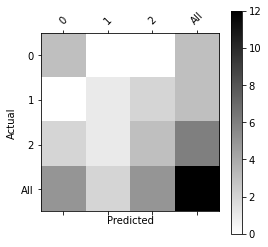

In [48]:
# Вы можете построить эту confusion_matrix с помощью

import matplotlib.pyplot as plt
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

plot_confusion_matrix(df_confusion)

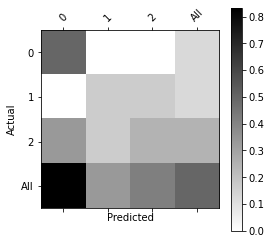

In [49]:
plot_confusion_matrix(df_conf_norm)  